#### What problem does pandas solve?

"Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R."

from: http://pandas.pydata.org/index.html


##### Pandas makes basic data operations easy and allow us to 'play' with the data! 

# Weather data
Our friend wants to better understand weather in his region so he obtained data on the weather over a period of time in a datafile 'weather_year_raw_data.csv'. He asks us to help him extract relevant information from this dataset.

(The data used in this notebook is a somewhat modified version of the data provided here http://synesthesiam.com/posts/an-introduction-to-pandas.html which was collected from https://www.wunderground.com/)

We will use python and pandas to analyze the data!

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

## Loading and organizing the data

We first load the datafile in a pandas DataFrame named 'data'. DataFrame is the primary pandas data structure.

In [4]:
data= pd.read_csv('data/weather_year_raw_data.csv')

data

,EDT,variable,value
0,2012-03-10,Max Wind SpeedMPH,13
1,2012-03-10,Mean Wind SpeedMPH,6
2,2012-03-10,Mean Sea Level PressureIn,30.45
3,2012-03-10,Max VisibilityMiles,10
4,2012-03-10,Mean VisibilityMiles,10
5,2012-03-10,Max Sea Level PressureIn,30.53
6,2012-03-10,Min VisibilityMiles,10
7,2012-03-10,Max Dew PointF,24
8,2012-03-10,Min Sea Level PressureIn,30.34
9,2012-03-10,CloudCover,0


In [5]:
data['variable']

0                Max Wind SpeedMPH
1               Mean Wind SpeedMPH
2        Mean Sea Level PressureIn
3              Max VisibilityMiles
4             Mean VisibilityMiles
5         Max Sea Level PressureIn
6              Min VisibilityMiles
7                   Max Dew PointF
8         Min Sea Level PressureIn
9                       CloudCover
10                  MeanDew PointF
11                 PrecipitationIn
12               Max Gust SpeedMPH
13                    Min Humidity
14                   Mean Humidity
15                   Min DewpointF
16                Min TemperatureF
17                  WindDirDegrees
18               Mean TemperatureF
19                Max TemperatureF
20                    Max Humidity
21               Max Wind SpeedMPH
22                  Max Dew PointF
23               Max Gust SpeedMPH
24                Min TemperatureF
25             Min VisibilityMiles
26                Max TemperatureF
27             Max VisibilityMiles
28                  

There are a number of variables and corresponding values for each date. What are the different variables?

In [6]:
data['variable'].unique()

array([' Max Wind SpeedMPH', ' Mean Wind SpeedMPH',
       ' Mean Sea Level PressureIn', ' Max VisibilityMiles',
       ' Mean VisibilityMiles', ' Max Sea Level PressureIn',
       ' Min VisibilityMiles', 'Max Dew PointF',
       ' Min Sea Level PressureIn', ' CloudCover', 'MeanDew PointF',
       'PrecipitationIn', ' Max Gust SpeedMPH', ' Min Humidity',
       ' Mean Humidity', 'Min DewpointF', 'Min TemperatureF',
       ' WindDirDegrees', 'Mean TemperatureF', 'Max TemperatureF',
       'Max Humidity', ' Events'], dtype=object)

We can restructure the data by creating one column for each variable and one row for each date.

In [7]:
data= data.pivot(index= 'EDT', columns= 'variable', values= 'value')

data.head()

variable,CloudCover,Events,Max Gust SpeedMPH,Max Sea Level PressureIn,Max VisibilityMiles,Max Wind SpeedMPH,Mean Humidity,Mean Sea Level PressureIn,Mean VisibilityMiles,Mean Wind SpeedMPH,...,Min VisibilityMiles,WindDirDegrees,Max Dew PointF,Max Humidity,Max TemperatureF,Mean TemperatureF,MeanDew PointF,Min DewpointF,Min TemperatureF,PrecipitationIn
EDT,,,,,,,,,,,,,,,,,,,,,
2012-03-10,0,None,17.0,30.53,10,13,50,30.45,10,6,...,10,138,24,74,56,40,20,16,24,0.00
2012-03-11,None,Rain,32.0,30.37,10,22,53,30.27,10,7,...,10,163,43,78,67,49,31,24,30,T
2012-03-12,6,Rain,36.0,30.13,10,24,76,29.99,10,14,...,6,190,59,90,71,62,55,43,53,0.03
2012-03-13,0,None,24.0,30.12,10,16,66,30.06,10,5,...,4,242,57,93,76,63,53,47,50,0.00
2012-03-14,0,None,22.0,30.15,10,16,68,30.1,10,6,...,10,202,58,93,80,62,52,43,44,0.00


We are interested in temperature and humidity as well as different amtospheric events. Therefore we subset only those columns.

In [9]:
data= data[['Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF', 
            'Max Humidity', ' Mean Humidity', ' Min Humidity',
            ' Events']]
data.head()

variable,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Humidity,Mean Humidity,Min Humidity,Events
EDT,,,,,,,
2012-03-10,56,40,24,74,50,26,None
2012-03-11,67,49,30,78,53,28,Rain
2012-03-12,71,62,53,90,76,61,Rain
2012-03-13,76,63,50,93,66,38,None
2012-03-14,80,62,44,93,68,42,None


In [10]:
data.dtypes

variable
Max TemperatureF     object
Mean TemperatureF    object
Min TemperatureF     object
Max Humidity         object
 Mean Humidity       object
 Min Humidity        object
 Events              object
dtype: object

In [11]:
data[['Max TemperatureF', 'Mean TemperatureF', 
      'Min TemperatureF', 'Max Humidity', 
      ' Mean Humidity', ' Min Humidity']]= data[['Max TemperatureF', 'Mean TemperatureF', 
                                                 'Min TemperatureF', 'Max Humidity', 
                                                 ' Mean Humidity', ' Min Humidity']].astype(float)

In [12]:
data.dtypes

variable
Max TemperatureF     float64
Mean TemperatureF    float64
Min TemperatureF     float64
Max Humidity         float64
 Mean Humidity       float64
 Min Humidity        float64
 Events               object
dtype: object

Our friend uses SI unit system so we have to first convert Farenheits to Celsius

In [13]:
max_temp= (data['Max TemperatureF']-32)*5./9

max_temp.head()

EDT
2012-03-10    13.333333
2012-03-11    19.444444
2012-03-12    21.666667
2012-03-13    24.444444
2012-03-14    26.666667
Name: Max TemperatureF, dtype: float64

In [14]:
mean_temp= (data['Mean TemperatureF']-32)*5./9
min_temp= (data['Min TemperatureF']-32)*5./9

data['max_temperature']= max_temp
data['mean_temperature']= mean_temp
data['min_temperature']= min_temp

data.head()

variable,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Humidity,Mean Humidity,Min Humidity,Events,max_temperature,mean_temperature,min_temperature
EDT,,,,,,,,,,
2012-03-10,56.0,40.0,24.0,74.0,50.0,26.0,None,13.333333,4.444444,-4.444444
2012-03-11,67.0,49.0,30.0,78.0,53.0,28.0,Rain,19.444444,9.444444,-1.111111
2012-03-12,71.0,62.0,53.0,90.0,76.0,61.0,Rain,21.666667,16.666667,11.666667
2012-03-13,76.0,63.0,50.0,93.0,66.0,38.0,None,24.444444,17.222222,10.000000
2012-03-14,80.0,62.0,44.0,93.0,68.0,42.0,None,26.666667,16.666667,6.666667


We can now remove columns with temperature in Farenheits.

In [15]:
list_of_columns_to_drop= ['Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF']
data= data.drop(list_of_columns_to_drop, axis= 1)
data.head()

variable,Max Humidity,Mean Humidity,Min Humidity,Events,max_temperature,mean_temperature,min_temperature
EDT,,,,,,,
2012-03-10,74.0,50.0,26.0,None,13.333333,4.444444,-4.444444
2012-03-11,78.0,53.0,28.0,Rain,19.444444,9.444444,-1.111111
2012-03-12,90.0,76.0,61.0,Rain,21.666667,16.666667,11.666667
2012-03-13,93.0,66.0,38.0,None,24.444444,17.222222,10.000000
2012-03-14,93.0,68.0,42.0,None,26.666667,16.666667,6.666667


We don't like some of the columns names so we can rename them.

In [16]:
renamed_columns= {'Max Humidity': 'max_humidity', ' Mean Humidity': 'mean_humidity', 
                  ' Min Humidity': 'min_humidity', ' Events': 'events'}
data= data.rename(columns= renamed_columns)

data.head()

variable,max_humidity,mean_humidity,min_humidity,events,max_temperature,mean_temperature,min_temperature
EDT,,,,,,,
2012-03-10,74.0,50.0,26.0,None,13.333333,4.444444,-4.444444
2012-03-11,78.0,53.0,28.0,Rain,19.444444,9.444444,-1.111111
2012-03-12,90.0,76.0,61.0,Rain,21.666667,16.666667,11.666667
2012-03-13,93.0,66.0,38.0,None,24.444444,17.222222,10.000000
2012-03-14,93.0,68.0,42.0,None,26.666667,16.666667,6.666667


## Basic analysis and quick visualisation

Let's take quick look at basic statistics of our data.

In [17]:
data.describe()

variable,max_humidity,mean_humidity,min_humidity,max_temperature,mean_temperature,min_temperature
count,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000
mean,90.027322,67.860656,45.193989,19.335155,13.157256,6.788432
std,9.108438,9.945591,15.360261,11.311804,10.242503,9.542534
min,54.000000,37.000000,15.000000,-8.888889,-11.666667,-16.111111
25%,85.000000,61.250000,35.000000,10.555556,5.000000,-1.111111
50%,93.000000,68.000000,42.000000,20.555556,15.000000,8.333333
75%,96.000000,74.000000,54.000000,28.888889,21.527778,14.444444
max,100.000000,95.000000,90.000000,41.111111,31.666667,25.000000


This analysis is a bit crude. We would like to desribe variation of temperature and humidity trough the year. We first convert dates in index from string to datetime object.

In [18]:
data.index=pd.to_datetime(data.index, format='%Y-%m-%d')
data.head()

variable,max_humidity,mean_humidity,min_humidity,events,max_temperature,mean_temperature,min_temperature
EDT,,,,,,,
2012-03-10,74.0,50.0,26.0,None,13.333333,4.444444,-4.444444
2012-03-11,78.0,53.0,28.0,Rain,19.444444,9.444444,-1.111111
2012-03-12,90.0,76.0,61.0,Rain,21.666667,16.666667,11.666667
2012-03-13,93.0,66.0,38.0,None,24.444444,17.222222,10.000000
2012-03-14,93.0,68.0,42.0,None,26.666667,16.666667,6.666667


We can now make quick plots of different variables in time.

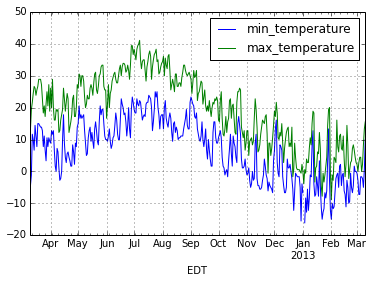

In [19]:
data['min_temperature'].plot()
data['max_temperature'].plot()
plt.grid()
plt.legend(loc= 'best')

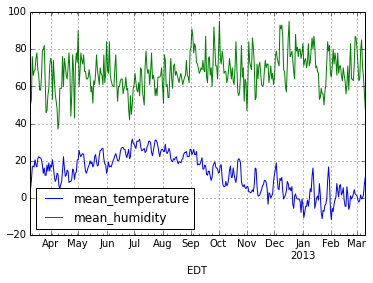

In [20]:
data['mean_temperature'].plot()
data['mean_humidity'].plot()
plt.grid()
plt.legend(loc= 'best')

We would also like to coarse-graind the data a bit by calculating monthly averages of mean humidity.

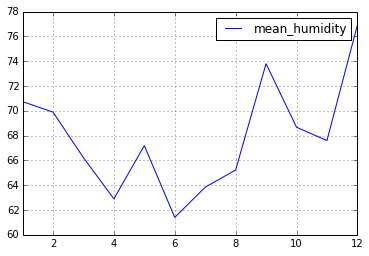

In [21]:
avg_mean_humidity= data['mean_humidity'].groupby(data.index.month).mean()

avg_mean_humidity.plot()
plt.grid()
plt.legend(loc= 'best')

## Freezing days

A very important information is the probability of freezing teperature in each month. We first determine for each date whether the min. temperature was smaller or equal to 0.

In [22]:
freeze_bool= (data['min_temperature'] <= 0)

freeze_bool

EDT
2012-03-10     True
2012-03-11     True
2012-03-12    False
2012-03-13    False
2012-03-14    False
2012-03-15    False
2012-03-16    False
2012-03-17    False
2012-03-18    False
2012-03-19    False
2012-03-20    False
2012-03-21    False
2012-03-22    False
2012-03-23    False
2012-03-24    False
2012-03-25    False
2012-03-26    False
2012-03-27    False
2012-03-28    False
2012-03-29    False
2012-03-30    False
2012-03-31    False
2012-04-01    False
2012-04-02    False
2012-04-03    False
2012-04-04    False
2012-04-05    False
2012-04-06    False
2012-04-07     True
2012-04-08    False
              ...  
2013-02-09     True
2013-02-10    False
2013-02-11    False
2013-02-12     True
2013-02-13     True
2013-02-14     True
2013-02-15     True
2013-02-16     True
2013-02-17     True
2013-02-18     True
2013-02-19     True
2013-02-20     True
2013-02-21     True
2013-02-22     True
2013-02-23     True
2013-02-24     True
2013-02-25     True
2013-02-26    False
2013-02-27     T

And now we can simply group this information by month and calculate probability by calculating the mean of boolean variables.

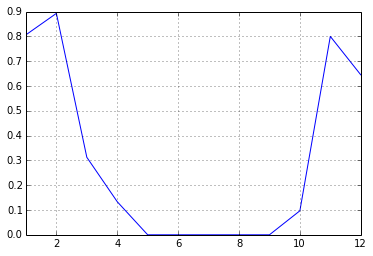

In [23]:
freeze_probability= freeze_bool.groupby(data.index.month).mean()

freeze_probability.plot()
plt.grid()

## Rainy days

We also have information about different atmospheric events. Let's take a look at what are the different events in our data. 

In [21]:
data['events'].unique()

array([None, 'Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'], dtype=object)

To find the rainy days we identify all rows with event containing the word 'Rain'

In [22]:
rain_bool= data['events'].str.contains('Rain', na= False)

rain_bool.head()

EDT
2012-03-10    False
2012-03-11     True
2012-03-12     True
2012-03-13    False
2012-03-14    False
Name: events, dtype: bool

And now we count the number of rainy days in each month.

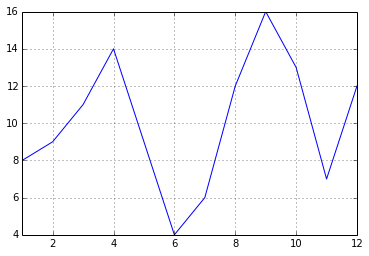

In [23]:
rainy_days= rain_bool.groupby(data.index.month).sum()

rainy_days.plot()
plt.grid()

# Correlation of weather and stock prices

Suddenly another friend shows up. He finds our analysis interesting and asks us to correlate temperature and humidity to stock prices.

In [25]:
import pandas.io.data
import datetime

/Library/Python/2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


We download stock data from yahoo finance for the same time interval we have the weather data.

In [26]:
stock = pd.io.data.get_data_yahoo('AAPL', 
                                  start=datetime.datetime(2012, 10, 3), 
                                  end=datetime.datetime(2013, 10, 3))
stock.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-10-03,664.860023,671.860023,662.630013,671.449974,106070300,89.213203
2012-10-04,671.250023,674.249985,665.550026,666.799988,92681400,88.595376
2012-10-05,665.200005,666.000023,651.280006,652.589996,148501500,86.707344
2012-10-08,646.880013,647.559975,636.109993,638.170013,159498500,84.791412
2012-10-09,638.650024,640.490013,623.550026,635.850014,209649300,84.483162


In [ ]:
# (in case there is no internet access)
#stock= pd.read_csv('data/stock_data.csv', index_col= 0)
#stock.head()

We can merge data and stock DataFrames by date.

In [27]:
merged= data[['mean_temperature', 'mean_humidity']].merge(stock, left_index= True, right_index= True, how= 'inner')
merged.head()

variable,mean_temperature,mean_humidity,Open,High,Low,Close,Volume,Adj Close
2012-10-03,17.777778,75.0,664.860023,671.860023,662.630013,671.449974,106070300,89.213203
2012-10-04,17.777778,72.0,671.250023,674.249985,665.550026,666.799988,92681400,88.595376
2012-10-05,10.555556,79.0,665.200005,666.000023,651.280006,652.589996,148501500,86.707344
2012-10-08,6.111111,68.0,646.880013,647.559975,636.109993,638.170013,159498500,84.791412
2012-10-09,8.888889,68.0,638.650024,640.490013,623.550026,635.850014,209649300,84.483162


And we can look at correlations between different columns.

In [28]:
merged.corr(method= 'pearson')

variable,mean_temperature,mean_humidity,Open,High,Low,Close,Volume,Adj Close
variable,,,,,,,,
mean_temperature,1.000000,0.009155,0.578277,0.587442,0.581067,0.585570,-0.054563,0.586152
mean_humidity,0.009155,1.000000,-0.209654,-0.211398,-0.212999,-0.210318,-0.127391,-0.208837
Open,0.578277,-0.209654,1.000000,0.996524,0.996215,0.990130,-0.004957,0.989803
High,0.587442,-0.211398,0.996524,1.000000,0.996218,0.996406,0.014794,0.996110
Low,0.581067,-0.212999,0.996215,0.996218,1.000000,0.995753,-0.049595,0.995576
Close,0.585570,-0.210318,0.990130,0.996406,0.995753,1.000000,-0.016356,0.999904
Volume,-0.054563,-0.127391,-0.004957,0.014794,-0.049595,-0.016356,1.000000,-0.019082
Adj Close,0.586152,-0.208837,0.989803,0.996110,0.995576,0.999904,-0.019082,1.000000


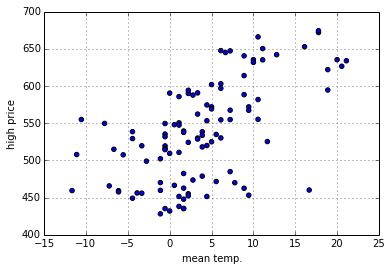

In [29]:
plt.scatter(merged['mean_temperature'], merged['High'])
plt.grid()
plt.xlabel('mean temp.')
plt.ylabel('high price')